In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE

In [21]:
num_clips = 5

In [22]:
# EPIC-KITCHEN
# TODO: Add actionnet color and labels

labels = {'EK':{
        0 : "take (get)",
        1 : "put-down (put/place)",
        2 : "open",
        3 : "close",
        4 : "wash (clean)",
        5 : "cut",
        6 : "stir (mix)",
        7 : "pour"
}}

colors = {'EK': {
        0 : "#A52A2A",
        1 : "#DAA520",
        2 : "#FF7F50",
        3 : "#7BC8F6",
        4 : "#FFFF14",
        5 : "#76FF7B",
        6 : "#13EAC9",
        7 : "olive"
}}

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# retrieve an img from a path
def getImage(path, zoom=0.05):
    return OffsetImage(plt.imread(path), zoom=zoom)

def visualize_features(title, filename, annotation, video_level=True, dataset='EK', save=True):
    data = pd.DataFrame(pd.read_pickle(filename)['features'])
    annotations = pd.read_pickle(annotation)
    data = pd.merge(data, annotations, how="inner", on="uid")
    features = data['features_RGB']
    if video_level:
        features = [f[num_clips//2] for f in features]
    reduced = TSNE().fit_transform(features)
    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]
    for i in range(8): # ek has 8 classes
        filtered = data[data["verb_class"] == i]
        # compute the central frame
        plt.scatter(filtered['x'], filtered['y'], c=colors[dataset][i], label=labels[dataset][i])
    plt.legend()
    plt.title(title)
    plt.savefig(f"img/{filename.split('/')[1]}.png")
    plt.show()

def visualize_features_img(title, filename, annotation, video_level=True, dataset='EK', save=True):
    data = pd.DataFrame(pd.read_pickle(filename)['features'])
    annotations = pd.read_pickle(annotation)
    data = pd.merge(data, annotations, how="inner", on="uid")
    features = data['features_RGB']
    if video_level:
        features = [f[num_clips//2] for f in features]
    reduced = TSNE().fit_transform(features)
    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]

    fig, ax = plt.subplots()
    for i in range(8): # ek has 8 classes
        filtered = data[data["verb_class"] == i]
        ax.scatter(filtered['x'], filtered['y'], c=colors[dataset][i], label=labels[dataset][i])
        paths = [f"../ek_data/frames/{video_id}/img_{(stop + start)//2:010d}.jpg" for start, stop, video_id in zip(filtered['start_frame'], filtered['stop_frame'], filtered['video_id'])]
        for x0, y0, path in zip(filtered['x'], filtered['y'], paths):
            ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
            ax.add_artist(ab)
    plt.title(title)
    plt.savefig(f"img/{filename.split('/')[1]}.png")
    plt.show()

def visualize_features_all(title):
    data_train = pd.DataFrame(pd.read_pickle("saved_features/EPIC/train/FT_D_D1_16f_5c_D1_train.pkl")['features'])
    annotations_train = pd.read_pickle("train_val/D1_train.pkl")
    data_train = pd.merge(data_train, annotations_train, how="inner", on="uid")

    data_test = pd.DataFrame(pd.read_pickle("saved_features/EPIC/test/FT_D_D1_16f_5c_D1_test.pkl")['features'])
    annotations_test = pd.read_pickle("train_val/D1_test.pkl")
    data_test = pd.merge(data_train, annotations_train, how="inner", on="uid")

    data = pd.concat([data_train, data_test])
    
    features = data['features_RGB']
    
    features = [f[num_clips//2] for f in features]
    reduced = TSNE().fit_transform(features)
    data['x'] = reduced[:, 0]
    data['y'] = reduced[:, 1]
    for i in range(8): # ek has 8 classes
        filtered = data[data["verb_class"] == i]
        plt.scatter(filtered['x'], filtered['y'], c=colors['EK'][i], label=labels['EK'][i])
    plt.title(title)
    plt.legend()
    plt.show()


/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


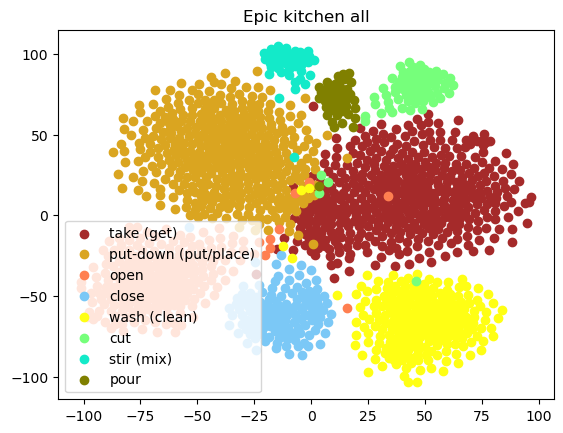

In [18]:
visualize_features_all("Epic kitchen all")

In [9]:
visualize_features("Init on kinetics dataset", "saved_features/EPIC/PT_D_16f_5c_D1_train.pkl", "train_val/D1_train.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'saved_features/EPIC/PT_D_16f_5c_D1_train.pkl'

/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gabb/miniconda3/envs/egovision/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


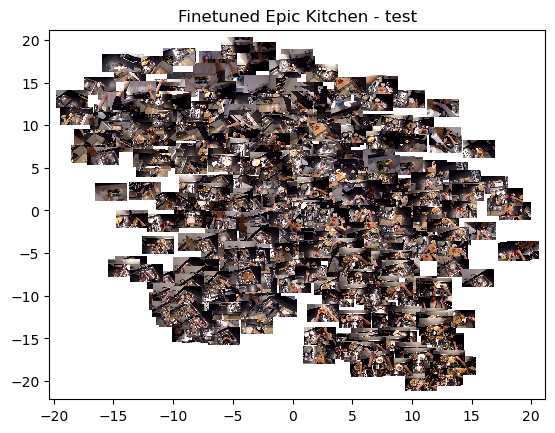

In [11]:
visualize_features_img("Finetuned Epic Kitchen - test", "saved_features/EPIC/FT_D_D1_16f_5c_D1_test.pkl", "train_val/D1_test.pkl")